In [1]:
import numpy as np
import healpy as hp
import glob

In [2]:
# Can grab files from https://github.com/lsst/sims_skybrightness_data/tree/master/data/ESO_Spectra/Moon
files = glob.glob('/Users/yoachim/lsst/stack/current/DarwinX86/sims_skybrightness_data/2017.05.05-2-gf1b2499/data/ESO_Spectra/Moon/*.npz')
files.sort()

In [3]:
files

['/Users/yoachim/lsst/stack/current/DarwinX86/sims_skybrightness_data/2017.05.05-2-gf1b2499/data/ESO_Spectra/Moon/moonSpectra_0.npz',
 '/Users/yoachim/lsst/stack/current/DarwinX86/sims_skybrightness_data/2017.05.05-2-gf1b2499/data/ESO_Spectra/Moon/moonSpectra_1.npz',
 '/Users/yoachim/lsst/stack/current/DarwinX86/sims_skybrightness_data/2017.05.05-2-gf1b2499/data/ESO_Spectra/Moon/moonSpectra_2.npz',
 '/Users/yoachim/lsst/stack/current/DarwinX86/sims_skybrightness_data/2017.05.05-2-gf1b2499/data/ESO_Spectra/Moon/moonSpectra_3.npz',
 '/Users/yoachim/lsst/stack/current/DarwinX86/sims_skybrightness_data/2017.05.05-2-gf1b2499/data/ESO_Spectra/Moon/moonSpectra_4.npz']

In [4]:
# Break this out of sims_skybrightness

def loadSpecFiles(filenames, mags=False):
    """
    Load up the ESO spectra.

    The ESO npz files contain the following arrays:
    filterWave: The central wavelengths of the pre-computed magnitudes
    wave: wavelengths for the spectra
    spec: array of spectra and magnitudes along with the relevant variable inputs.  For example,
    airglow has dtype = [('airmass', '<f8'), ('solarFlux', '<f8'), ('spectra', '<f8', (17001,)),
                         ('mags', '<f8', (6,)]
    For each unique airmass and solarFlux value, there is a 17001 elements spectra and 6 magnitudes.
    """

    if len(filenames) == 1:
        temp = np.load(filenames[0])
        wave = temp['wave'].copy()
        filterWave = temp['filterWave'].copy()
        if mags:
            # don't copy the spectra to save memory space
            dt = np.dtype([(key, temp['spec'].dtype[i]) for
                           i, key in enumerate(temp['spec'].dtype.names) if key != 'spectra'])
            spec = np.zeros(temp['spec'].size, dtype=dt)
            for key in temp['spec'].dtype.names:
                if key != 'spectra':
                    spec[key] = temp['spec'][key].copy()
        else:
            spec = temp['spec'].copy()
    else:
        temp = np.load(filenames[0])
        wave = temp['wave'].copy()
        filterWave = temp['filterWave'].copy()
        if mags:
            # don't copy the spectra to save memory space
            dt = np.dtype([(key, temp['spec'].dtype[i]) for
                           i, key in enumerate(temp['spec'].dtype.names) if key != 'spectra'])
            spec = np.zeros(temp['spec'].size, dtype=dt)
            for key in temp['spec'].dtype.names:
                if key != 'spectra':
                    spec[key] = temp['spec'][key].copy()
        else:
            spec = temp['spec'].copy()
        for filename in filenames[1:]:
            temp = np.load(filename)
            if mags:
                # don't copy the spectra to save memory space
                dt = np.dtype([(key, temp['spec'].dtype[i]) for
                               i, key in enumerate(temp['spec'].dtype.names) if key != 'spectra'])
                tempspec = np.zeros(temp['spec'].size, dtype=dt)
                for key in temp['spec'].dtype.names:
                    if key != 'spectra':
                        tempspec[key] = temp['spec'][key].copy()
            else:
                tempspec = temp['spec']
            spec = np.append(spec, tempspec)
    return spec, wave, filterWave


In [5]:
spec, wave, fw = loadSpecFiles(files)

In [6]:
nside = 4

print('HEALpix ID, altitude (deg), az to moon (deg), moon alt (deg), moon-sup separation (deg), u, g, r, i, z, y (mag/sq arcsec)')
for sp in spec:
    lat, azimuth_to_moon = hp.pix2ang(nside, sp['hpid'])
    alt = np.pi / 2.0 - lat
    print(sp['hpid'], np.degrees(alt), np.degrees(azimuth_to_moon), sp['moonAltitude'], sp['moonSunSep'], sp['mags'])

HEALpix ID, altitude (deg), az to moon (deg), moon alt (deg), moon-sup separation (deg), u, g, r, i, z, y (mag/sq arcsec)
0 78.28414760510762 45.0 -1.0 0.0 [31.36691811 29.56779517 29.14289525 29.15654809 29.29318208 29.35887861]
1 78.28414760510762 135.0 -1.0 0.0 [31.35095312 29.55331125 29.11330931 29.11997848 29.26802108 29.33263534]
4 66.44353569089876 22.5 -1.0 0.0 [31.26839262 29.44010775 29.0136325  29.02349954 29.13913972 29.20059179]
5 66.44353569089876 67.5 -1.0 0.0 [31.32216423 29.50503498 29.07478919 29.08810559 29.22349194 29.29108213]
6 66.44353569089876 112.5 -1.0 0.0 [31.30762005 29.49122551 29.04427954 29.04990734 29.19746826 29.26395234]
7 66.44353569089876 157.5 -1.0 0.0 [31.24994047 29.41483213 28.95341382 28.9506739  29.099102   29.16111274]
12 54.34091230386124 14.999999999999998 -1.0 0.0 [31.1125227  29.23043829 28.7837376  28.77743177 28.8628647  28.91316726]
13 54.34091230386124 45.0 -1.0 0.0 [31.17577664 29.30972258 28.87116979 28.87761036 28.98640219 29.04855

15 54.34091230386124 105.0 45.0 0.0 [27.94816946 26.93236145 26.9174885  27.18612791 27.34552417 26.94974076]
16 54.34091230386124 135.0 45.0 0.0 [28.01859498 27.07173366 27.11322449 27.4134369  27.59653662 27.21531095]
17 54.34091230386124 165.0 45.0 0.0 [28.03670618 27.11957359 27.18974446 27.50741664 27.7036336  27.32974533]
24 41.81031489577859 11.25 45.0 0.0 [26.94953406 25.47145578 25.18007175 25.25845712 25.26170188 24.76276132]
25 41.81031489577859 33.75 45.0 0.0 [27.30280323 25.94997047 25.74478265 25.88513673 25.93132823 25.45305291]
26 41.81031489577859 56.24999999999999 45.0 0.0 [27.56043694 26.33110444 26.19464552 26.39423193 26.49842375 26.05708598]
27 41.81031489577859 78.75 45.0 0.0 [27.73387811 26.6278257  26.56099876 26.80314317 26.94663172 26.53369173]
28 41.81031489577859 101.24999999999999 45.0 0.0 [27.83999383 26.82749349 26.82809446 27.10754487 27.27980443 26.88623703]
29 41.81031489577859 123.74999999999999 45.0 0.0 [27.88653596 26.93204545 26.98526909 27.295774

61 19.471220634490685 123.74999999999999 75.0 0.0 [27.38206845 26.2933655  26.27318157 26.56745884 26.75579565 26.36384584]
62 19.471220634490685 146.25 75.0 0.0 [27.39136911 26.31884372 26.31451443 26.61919623 26.81470992 26.42769662]
63 19.471220634490685 168.74999999999997 75.0 0.0 [27.39312694 26.32854214 26.33232861 26.64260877 26.84192484 26.45754751]
0 78.28414760510762 45.0 90.0 0.0 [27.2626749  25.91818342 25.67819021 25.78112233 25.79772381 25.28647456]
1 78.28414760510762 135.0 90.0 0.0 [27.2626749  25.91818342 25.67819021 25.78112233 25.79772381 25.28647456]
4 66.44353569089876 22.5 90.0 0.0 [27.44730438 26.19196861 26.01742828 26.17037855 26.22011628 25.72528964]
5 66.44353569089876 67.5 90.0 0.0 [27.44730438 26.19196861 26.01742828 26.17037855 26.22011628 25.72528964]
6 66.44353569089876 112.5 90.0 0.0 [27.44730438 26.19196861 26.01742828 26.17037855 26.22011628 25.72528964]
7 66.44353569089876 157.5 90.0 0.0 [27.44730438 26.19196861 26.01742828 26.17037855 26.22011628 25

63 19.471220634490685 168.74999999999997 15.0 15.0 [26.14254441 24.86929242 24.87368575 25.19077079 25.44989379 25.46922128]
0 78.28414760510762 45.0 30.0 15.0 [26.63671444 25.64891349 25.60154028 25.84261305 26.01069769 25.91727341]
1 78.28414760510762 135.0 30.0 15.0 [26.76234733 25.8928189  25.93211886 26.2204045  26.42431303 26.35476089]
4 66.44353569089876 22.5 30.0 15.0 [26.43429439 25.3190303  25.20092476 25.40088196 25.5317818  25.41265804]
5 66.44353569089876 67.5 30.0 15.0 [26.59747489 25.61307054 25.5703283  25.81523648 25.98659321 25.89688681]
6 66.44353569089876 112.5 30.0 15.0 [26.72124043 25.85493876 25.90205828 26.19623751 26.40449127 26.33893717]
7 66.44353569089876 157.5 30.0 15.0 [26.75612419 25.94133074 26.03853257 26.3632093  26.59371633 26.54044939]
12 54.34091230386124 14.999999999999998 30.0 15.0 [26.1523586  24.90977665 24.72595074 24.87671918 24.96166765 24.81365778]
13 54.34091230386124 45.0 30.0 15.0 [26.35249111 25.22953413 25.11055296 25.31327827 25.447511

30 41.81031489577859 146.25 90.0 15.0 [26.06571096 25.09809833 25.03816066 25.28666285 25.45611635 25.31156238]
31 41.81031489577859 168.74999999999997 90.0 15.0 [26.06571096 25.09809833 25.03816066 25.28666285 25.45611635 25.31156238]
40 30.000000000000004 0.0 90.0 15.0 [25.98405069 25.04585445 25.01652041 25.29031241 25.4833576  25.35996704]
41 30.000000000000004 22.5 90.0 15.0 [25.98405069 25.04585445 25.01652041 25.29031241 25.4833576  25.35996704]
42 30.000000000000004 45.0 90.0 15.0 [25.98405069 25.04585445 25.01652041 25.29031241 25.4833576  25.35996704]
43 30.000000000000004 67.5 90.0 15.0 [25.98405069 25.04585445 25.01652041 25.29031241 25.4833576  25.35996704]
44 30.000000000000004 90.0 90.0 15.0 [25.98405069 25.04585445 25.01652041 25.29031241 25.4833576  25.35996704]
45 30.000000000000004 112.49999999999999 90.0 15.0 [25.98405069 25.04585445 25.01652041 25.29031241 25.4833576  25.35996704]
46 30.000000000000004 135.0 90.0 15.0 [25.98405069 25.04585445 25.01652041 25.2903124

62 19.471220634490685 146.25 15.0 30.0 [24.9667049  23.81815459 23.85079864 24.17144637 24.4557273  24.69810815]
63 19.471220634490685 168.74999999999997 15.0 30.0 [24.86592556 23.70529842 23.73294155 24.05415843 24.33903919 24.58236725]
0 78.28414760510762 45.0 30.0 30.0 [25.35538938 24.48392577 24.4612877  24.70662858 24.90261081 25.03275235]
1 78.28414760510762 135.0 30.0 30.0 [25.47981765 24.72648518 24.79137094 25.08451783 25.31567675 25.47092356]
4 66.44353569089876 22.5 30.0 30.0 [25.1544713  24.15522705 24.06107444 24.26477635 24.42427328 24.52734346]
5 66.44353569089876 67.5 30.0 30.0 [25.31616521 24.44801887 24.4300403  24.67922798 24.87842008 25.01234426]
6 66.44353569089876 112.5 30.0 30.0 [25.43873635 24.68851551 24.76125176 25.06032568 25.29576067 25.45507485]
7 66.44353569089876 157.5 30.0 30.0 [25.47305887 24.77424135 24.89739839 25.22735584 25.48468983 25.65695667]
12 54.34091230386124 14.999999999999998 30.0 30.0 [24.87424716 23.74701459 23.58654527 23.7404756  23.854

15 54.34091230386124 105.0 75.0 30.0 [24.86784978 23.99391112 23.94162027 24.18136985 24.36109935 24.43446076]
16 54.34091230386124 135.0 75.0 30.0 [24.9365551  24.10953255 24.08323799 24.33964644 24.53427615 24.62006914]
17 54.34091230386124 165.0 75.0 30.0 [24.97039353 24.16833112 24.15681462 24.42184137 24.6237837  24.7157477 ]
24 41.81031489577859 11.25 75.0 30.0 [24.58692696 23.61187512 23.51056817 23.71750875 23.87015632 23.91778095]
25 41.81031489577859 33.75 75.0 30.0 [24.63274316 23.68047263 23.59123209 23.8084151  23.97102779 24.02622034]
26 41.81031489577859 56.24999999999999 75.0 30.0 [24.70461471 23.79213242 23.72368526 23.95671038 24.13459006 24.20198782]
27 41.81031489577859 78.75 75.0 30.0 [24.77831467 23.91354701 23.87120289 24.12142184 24.31477696 24.39525391]
28 41.81031489577859 101.24999999999999 75.0 30.0 [24.84147831 24.02316402 24.00802761 24.27423327 24.48098024 24.57283666]
29 41.81031489577859 123.74999999999999 75.0 30.0 [24.88820138 24.10799432 24.11735728 

47 30.000000000000004 157.5 15.0 45.0 [24.07923476 23.16783521 23.28290332 23.62220211 23.93378859 24.32425937]
48 30.000000000000004 180.0 15.0 45.0 [24.03996741 23.12249286 23.23590545 23.57647128 23.88877711 24.27987138]
56 19.471220634490685 11.25 15.0 45.0 [23.34703483 21.71804152 21.32978777 21.32882371 21.39345358 21.61125795]
57 19.471220634490685 33.75 15.0 45.0 [23.72296087 22.27768957 22.00582896 22.0963546  22.2264893  22.48542574]
58 19.471220634490685 56.24999999999999 15.0 45.0 [23.98249863 22.72180325 22.55284911 22.7116895  22.90190943 23.21099852]
59 19.471220634490685 78.75 15.0 45.0 [24.12981238 23.00575283 22.94296514 23.16197053 23.39483299 23.73647809]
60 19.471220634490685 101.24999999999999 15.0 45.0 [24.1341775  23.08063572 23.09624915 23.37030304 23.6406791  24.0066936 ]
61 19.471220634490685 123.74999999999999 15.0 45.0 [24.01988451 22.97834533 23.02847674 23.33752562 23.63226465 24.01506528]
62 19.471220634490685 146.25 15.0 45.0 [23.88806603 22.82445459 22

15 54.34091230386124 105.0 90.0 45.0 [23.68879029 22.85686393 22.79937301 23.02148737 23.20304847 23.40788748]
16 54.34091230386124 135.0 90.0 45.0 [23.68879029 22.85686393 22.79937301 23.02148737 23.20304847 23.40788748]
17 54.34091230386124 165.0 90.0 45.0 [23.68879029 22.85686393 22.79937301 23.02148737 23.20304847 23.40788748]
24 41.81031489577859 11.25 90.0 45.0 [23.70083095 22.93899172 22.92410605 23.1806522  23.39748277 23.62859438]
25 41.81031489577859 33.75 90.0 45.0 [23.70083095 22.93899172 22.92410605 23.1806522  23.39748277 23.62859438]
26 41.81031489577859 56.24999999999999 90.0 45.0 [23.70083095 22.93899172 22.92410605 23.1806522  23.39748277 23.62859438]
27 41.81031489577859 78.75 90.0 45.0 [23.70083095 22.93899172 22.92410605 23.1806522  23.39748277 23.62859438]
28 41.81031489577859 101.24999999999999 90.0 45.0 [23.70083095 22.93899172 22.92410605 23.1806522  23.39748277 23.62859438]
29 41.81031489577859 123.74999999999999 90.0 45.0 [23.70083095 22.93899172 22.92410605 

46 30.000000000000004 135.0 30.0 60.0 [22.98398421 22.35331551 22.52681454 22.89807217 23.22093145 23.64373157]
47 30.000000000000004 157.5 30.0 60.0 [22.9126957  22.28133305 22.46601282 22.85198118 23.18458914 23.61476996]
48 30.000000000000004 180.0 30.0 60.0 [22.88285078 22.24926608 22.43578567 22.82549175 23.16047252 23.59256709]
56 19.471220634490685 11.25 30.0 60.0 [22.00823402 20.74024833 20.47370415 20.54812012 20.65370634 20.90994938]
57 19.471220634490685 33.75 30.0 60.0 [22.37072077 21.22030307 21.03705672 21.18819208 21.35153266 21.64714947]
58 19.471220634490685 56.24999999999999 30.0 60.0 [22.65311696 21.65338037 21.55176747 21.76338952 21.98122241 22.32575636]
59 19.471220634490685 78.75 30.0 60.0 [22.81448681 21.94789226 21.94096051 22.20652395 22.46272389 22.8410284 ]
60 19.471220634490685 101.24999999999999 30.0 60.0 [22.84998095 22.06257335 22.13397713 22.45086383 22.74109637 23.14486514]
61 19.471220634490685 123.74999999999999 30.0 60.0 [22.7812677  22.02204858 22.

0 78.28414760510762 45.0 75.0 60.0 [22.48561291 21.52651717 21.35946294 21.47649933 21.59572866 21.8282926 ]
1 78.28414760510762 135.0 75.0 60.0 [22.77159391 21.93086617 21.84587892 22.02404183 22.18093243 22.43559918]
4 66.44353569089876 22.5 75.0 60.0 [22.44005604 21.47959625 21.31331439 21.4314302  21.55119519 21.78521508]
5 66.44353569089876 67.5 75.0 60.0 [22.67054388 21.80328986 21.70296015 21.86923821 22.01714349 22.26712672]
6 66.44353569089876 112.5 75.0 60.0 [22.84281352 22.05298182 21.99984986 22.20985663 22.3943196  22.67014744]
7 66.44353569089876 157.5 75.0 60.0 [22.92693336 22.18387643 22.15570721 22.38622678 22.58960014 22.8808375 ]
12 54.34091230386124 14.999999999999998 75.0 60.0 [22.5495214  21.65977738 21.5488875  21.70974748 21.85381914 22.10317557]
13 54.34091230386124 45.0 75.0 60.0 [22.64991528 21.80150626 21.71801928 21.90432429 22.06845908 22.33054762]
14 54.34091230386124 75.0 75.0 60.0 [22.77620637 21.98741439 21.93763905 22.15489692 22.34628041 22.62980231]

25 41.81031489577859 33.75 15.0 75.0 [22.56720586 21.49066649 21.35397062 21.49290286 21.67866123 22.07452246]
26 41.81031489577859 56.24999999999999 15.0 75.0 [22.713601   21.77908703 21.72956763 21.9183406  22.14446761 22.57413017]
27 41.81031489577859 78.75 15.0 75.0 [22.82151324 21.99766163 22.03896807 22.27807643 22.53902036 22.99416983]
28 41.81031489577859 101.24999999999999 15.0 75.0 [22.84842146 22.09135132 22.20321002 22.48902738 22.78177146 23.25621851]
29 41.81031489577859 123.74999999999999 15.0 75.0 [22.79309262 22.06477511 22.21777465 22.5378458  22.85454357 23.34357428]
30 41.81031489577859 146.25 15.0 75.0 [22.7110488  21.98373378 22.1520973  22.49083804 22.82056793 23.31778445]
31 41.81031489577859 168.74999999999997 15.0 75.0 [22.656033   21.92262358 22.09398432 22.43954639 22.77400726 23.27423371]
40 30.000000000000004 0.0 15.0 75.0 [22.02385595 20.62895549 20.32232318 20.34465987 20.44409472 20.77628976]
41 30.000000000000004 22.5 15.0 75.0 [22.19293211 20.90337515

26 41.81031489577859 56.24999999999999 45.0 75.0 [22.04497103 21.2474897  21.20150235 21.4216145  21.63462571 21.97262867]
27 41.81031489577859 78.75 45.0 75.0 [22.21303003 21.53988251 21.56633159 21.83065575 22.08034526 22.45159756]
28 41.81031489577859 101.24999999999999 45.0 75.0 [22.3155322  21.73562767 21.83199081 22.13512751 22.41180071 22.80568736]
29 41.81031489577859 123.74999999999999 45.0 75.0 [22.35980133 21.83745365 21.98792791 22.32339555 22.62201851 23.03201132]
30 41.81031489577859 146.25 45.0 75.0 [22.36398155 21.87283809 22.0566564  22.41539405 22.72909462 23.14955754]
31 41.81031489577859 168.74999999999997 45.0 75.0 [22.35558452 21.87703079 22.07624549 22.44663646 22.76797497 23.19388707]
40 30.000000000000004 0.0 45.0 75.0 [21.37816198 20.32978004 20.1394426  20.24774233 20.37499826 20.64980213]
41 30.000000000000004 22.5 45.0 75.0 [21.54771417 20.55883751 20.41387159 20.55974391 20.71124637 21.00057161]
42 30.000000000000004 45.0 45.0 75.0 [21.80940224 20.93159179

7 66.44353569089876 157.5 90.0 75.0 [21.93222542 21.10969345 21.02536767 21.19925332 21.36123194 21.64332541]
12 54.34091230386124 14.999999999999998 90.0 75.0 [22.03325104 21.2887093  21.25331424 21.47643898 21.68122404 21.99765799]
13 54.34091230386124 45.0 90.0 75.0 [22.03325104 21.2887093  21.25331424 21.47643898 21.68122404 21.99765799]
14 54.34091230386124 75.0 90.0 75.0 [22.03325104 21.2887093  21.25331424 21.47643898 21.68122404 21.99765799]
15 54.34091230386124 105.0 90.0 75.0 [22.03325104 21.2887093  21.25331424 21.47643898 21.68122404 21.99765799]
16 54.34091230386124 135.0 90.0 75.0 [22.03325104 21.2887093  21.25331424 21.47643898 21.68122404 21.99765799]
17 54.34091230386124 165.0 90.0 75.0 [22.03325104 21.2887093  21.25331424 21.47643898 21.68122404 21.99765799]
24 41.81031489577859 11.25 90.0 75.0 [22.04468157 21.37036358 21.37785091 21.63576689 21.87530446 22.21931281]
25 41.81031489577859 33.75 90.0 75.0 [22.04468157 21.37036358 21.37785091 21.63576689 21.87530446 22.2

15 54.34091230386124 105.0 0.0 90.0 [24.62246998 23.23727515 22.92268039 22.89944424 23.09816813 23.76044773]
16 54.34091230386124 135.0 0.0 90.0 [24.54253628 23.14002077 22.82116471 22.8070286  23.02307112 23.69505914]
17 54.34091230386124 165.0 0.0 90.0 [24.47650714 23.05371357 22.72871768 22.71602366 22.9368502  23.61135816]
24 41.81031489577859 11.25 0.0 90.0 [24.34018509 22.78262413 22.28707719 22.0821506  22.11283375 22.66129777]
25 41.81031489577859 33.75 0.0 90.0 [24.38382651 22.85989235 22.41778599 22.25921185 22.32659999 22.90231594]
26 41.81031489577859 56.24999999999999 0.0 90.0 [24.46622388 22.97944576 22.59488073 22.49351357 22.60924903 23.21852292]
27 41.81031489577859 78.75 0.0 90.0 [24.53620553 23.07274168 22.72118918 22.66432331 22.82600695 23.46369979]
28 41.81031489577859 101.24999999999999 0.0 90.0 [24.52551894 23.06821922 22.72489792 22.69280731 22.88846999 23.54580219]
29 41.81031489577859 123.74999999999999 0.0 90.0 [24.44857885 22.97115235 22.62230558 22.599143

46 30.000000000000004 135.0 45.0 90.0 [21.53071092 21.00062554 21.18100353 21.54825814 21.87476533 22.29676794]
47 30.000000000000004 157.5 45.0 90.0 [21.49451434 20.97772576 21.17757467 21.56169835 21.89951502 22.33034772]
48 30.000000000000004 180.0 45.0 90.0 [21.48006417 20.96524255 21.17025026 21.55971854 21.90101233 22.33462712]
56 19.471220634490685 11.25 45.0 90.0 [20.73359593 19.68038782 19.51729442 19.66986856 19.83746086 20.12728017]
57 19.471220634490685 33.75 45.0 90.0 [20.93266651 19.94914493 19.8255738  20.01793148 20.22171174 20.54236426]
58 19.471220634490685 56.24999999999999 45.0 90.0 [21.14057326 20.2713077  20.20976007 20.4452027  20.68671868 21.04366076]
59 19.471220634490685 78.75 45.0 90.0 [21.27973876 20.52108157 20.53638552 20.81571848 21.08814279 21.47389704]
60 19.471220634490685 101.24999999999999 45.0 90.0 [21.33620538 20.65179405 20.73621066 21.05817148 21.35867492 21.76704552]
61 19.471220634490685 123.74999999999999 45.0 90.0 [21.30824184 20.66291764 20.

15 54.34091230386124 105.0 15.0 105.0 [21.8311746  21.13072411 21.26606673 21.5587683  21.86101358 22.32089332]
16 54.34091230386124 135.0 15.0 105.0 [21.78250893 21.11524613 21.29390693 21.62139955 21.9479874  22.42232669]
17 54.34091230386124 165.0 15.0 105.0 [21.73011993 21.06754914 21.26034627 21.60301043 21.94035744 22.42119499]
24 41.81031489577859 11.25 15.0 105.0 [21.27576158 20.10597898 19.91980454 20.01940438 20.17837933 20.52291174]
25 41.81031489577859 33.75 15.0 105.0 [21.4085595  20.34995867 20.22424056 20.3680261  20.56557793 20.94071181]
26 41.81031489577859 56.24999999999999 15.0 105.0 [21.55476059 20.63809725 20.59977386 20.79347862 21.03131247 21.4405482 ]
27 41.81031489577859 78.75 15.0 105.0 [21.66253701 20.8564066  20.90910646 21.15322909 21.42580897 21.86077883]
28 41.81031489577859 101.24999999999999 15.0 105.0 [21.68935258 20.94992332 21.07328636 21.36419421 21.66851364 22.1229833 ]
29 41.81031489577859 123.74999999999999 15.0 105.0 [21.63396564 20.92327683 21.

56 19.471220634490685 11.25 75.0 105.0 [20.54741506 19.76573563 19.73903112 19.99963303 20.25767609 20.59825985]
57 19.471220634490685 33.75 75.0 105.0 [20.57232346 19.80912797 19.7944231  20.06191111 20.32491453 20.67031173]
58 19.471220634490685 56.24999999999999 75.0 105.0 [20.61239848 19.88028708 19.88675152 20.16621407 20.43762727 20.79110844]
59 19.471220634490685 78.75 75.0 105.0 [20.6529939  19.95613394 19.98968803 20.28463185 20.56635325 20.9292641 ]
60 19.471220634490685 101.24999999999999 75.0 105.0 [20.68567097 20.02089836 20.08159949 20.39223923 20.6844381  21.05636751]
61 19.471220634490685 123.74999999999999 75.0 105.0 [20.70209132 20.06223279 20.14666342 20.47195187 20.7738365  21.15371035]
62 19.471220634490685 146.25 75.0 105.0 [20.71069766 20.08690378 20.18758399 20.52361299 20.83227123 21.21757673]
63 19.471220634490685 168.74999999999997 75.0 105.0 [20.71210465 20.09620604 20.20517922 20.54698312 20.85922977 21.24743232]
0 78.28414760510762 45.0 90.0 105.0 [20.5929

61 19.471220634490685 123.74999999999999 0.0 120.0 [23.34680511 21.45789826 20.95474579 20.89834438 21.10799952 21.75313425]
62 19.471220634490685 146.25 0.0 120.0 [23.24944148 21.29838486 20.77054481 20.70829101 20.91775121 21.5640736 ]
63 19.471220634490685 168.74999999999997 0.0 120.0 [23.13403061 21.16375883 20.6219379  20.55355702 20.75930361 21.40537702]
0 78.28414760510762 45.0 15.0 120.0 [21.45919777 20.72025306 20.78805486 21.03545949 21.30669208 21.74016293]
1 78.28414760510762 135.0 15.0 120.0 [21.51238803 20.85085211 20.99708399 21.2927964  21.59702205 22.05061042]
4 66.44353569089876 22.5 15.0 120.0 [21.31504688 20.46819097 20.4555753  20.66089188 20.90292408 21.3156434 ]
5 66.44353569089876 67.5 15.0 120.0 [21.40967167 20.66131936 20.7268291  20.97449024 21.24603952 21.6807458 ]
6 66.44353569089876 112.5 15.0 120.0 [21.46113478 20.79270656 20.93986255 21.23849465 21.54478853 22.00064154]
7 66.44353569089876 157.5 15.0 120.0 [21.43276256 20.79572059 20.98210548 21.31115532

44 30.000000000000004 90.0 75.0 120.0 [20.35936584 19.74793565 19.80978201 20.10833661 20.38910431 20.73873329]
45 30.000000000000004 112.49999999999999 75.0 120.0 [20.40029438 19.82492435 19.91416541 20.22803876 20.51922892 20.87803616]
46 30.000000000000004 135.0 75.0 120.0 [20.42661663 19.87752991 19.98933405 20.31614373 20.61589488 20.98183083]
47 30.000000000000004 157.5 75.0 120.0 [20.44135336 19.90777248 20.03322173 20.36794343 20.67301952 21.04323258]
48 30.000000000000004 180.0 75.0 120.0 [20.44549782 19.91703383 20.04722389 20.38478643 20.69176059 21.06347394]
56 19.471220634490685 11.25 75.0 120.0 [20.08543153 19.31698407 19.29787022 19.56614314 19.82964012 20.16914371]
57 19.471220634490685 33.75 75.0 120.0 [20.11032841 19.36035753 19.35325716 19.6284182  19.89687679 20.24119609]
58 19.471220634490685 56.24999999999999 75.0 120.0 [20.15038407 19.43148422 19.44557682 19.73271589 20.00958658 20.36199365]
59 19.471220634490685 78.75 75.0 120.0 [20.19095876 19.50729157 19.54850

0 78.28414760510762 45.0 15.0 135.0 [21.03622521 20.31536049 20.39445251 20.65185512 20.92853343 21.36694001]
1 78.28414760510762 135.0 15.0 135.0 [21.08935323 20.4458294  20.60342343 20.90916196 21.21885423 21.67738921]
4 66.44353569089876 22.5 15.0 135.0 [20.89215995 20.06345938 20.06202389 20.27731303 20.5247744  20.94241886]
5 66.44353569089876 67.5 15.0 135.0 [20.98671198 20.25643493 20.3332271  20.59088531 20.86788027 21.30752269]
6 66.44353569089876 112.5 15.0 135.0 [21.03811004 20.38768813 20.54619931 20.8548581  21.16661957 21.6274202 ]
7 66.44353569089876 157.5 15.0 135.0 [21.00970354 20.39065249 20.58840686 20.92750006 21.26028206 21.73325476]
12 54.34091230386124 14.999999999999998 15.0 135.0 [20.68531812 19.7171447  19.63466562 19.80739945 20.02140158 20.41284682]
13 54.34091230386124 45.0 15.0 135.0 [20.79113175 19.92968209 19.91328324 20.12329393 20.36732218 20.784014  ]
14 54.34091230386124 75.0 15.0 135.0 [20.90418817 20.16031074 20.23747326 20.49853853 20.7780781  21.

5 66.44353569089876 67.5 60.0 135.0 [20.03439769 19.28542839 19.25265743 19.47112049 19.67577971 19.96321394]
6 66.44353569089876 112.5 60.0 135.0 [20.24278223 19.61854909 19.65359431 19.92445011 20.17631763 20.50368857]
7 66.44353569089876 157.5 60.0 135.0 [20.33368913 19.78002688 19.85715011 20.15270803 20.42481377 20.77042122]
12 54.34091230386124 14.999999999999998 60.0 135.0 [19.53795088 18.61186331 18.46453243 18.59709529 18.74424418 18.99599208]
13 54.34091230386124 45.0 60.0 135.0 [19.84317137 19.03862494 18.97586307 19.17066131 19.35591901 19.63099976]
14 54.34091230386124 75.0 60.0 135.0 [20.0742042  19.38492721 19.38744487 19.6395413  19.87510757 20.19003791]
15 54.34091230386124 105.0 60.0 135.0 [20.22202633 19.6373705  19.6994052  19.9891804  20.25710029 20.6013368 ]
16 54.34091230386124 135.0 60.0 135.0 [20.30417434 19.79062473 19.90053403 20.21676184 20.50403267 20.86556384]
17 54.34091230386124 165.0 60.0 135.0 [20.34053097 19.85996283 19.99486862 20.32482316 20.6215832

48 30.000000000000004 180.0 -1.0 150.0 [22.86800274 21.18566419 20.70139872 20.67242256 20.89818376 21.62645929]
56 19.471220634490685 11.25 -1.0 150.0 [22.71157324 20.80688938 20.22670586 20.07767443 20.07657904 20.61879   ]
57 19.471220634490685 33.75 -1.0 150.0 [22.75945315 20.90920067 20.39433299 20.32576519 20.41757211 21.03993902]
58 19.471220634490685 56.24999999999999 -1.0 150.0 [22.90178186 21.08957235 20.61139398 20.59081614 20.75338632 21.43819807]
59 19.471220634490685 78.75 -1.0 150.0 [23.06789763 21.25973953 20.77295684 20.76296348 20.96747878 21.68533234]
60 19.471220634490685 101.24999999999999 -1.0 150.0 [23.12926159 21.29323214 20.7679152  20.74127835 20.96193712 21.69011484]
61 19.471220634490685 123.74999999999999 -1.0 150.0 [23.09456642 21.18866686 20.61932246 20.57138355 20.79052643 21.5170098 ]
62 19.471220634490685 146.25 -1.0 150.0 [23.03051556 21.05061487 20.44477745 20.3821041  20.59436723 21.3175252 ]
63 19.471220634490685 168.74999999999997 -1.0 150.0 [22.9

31 41.81031489577859 168.74999999999997 45.0 150.0 [19.90196081 19.49190054 19.73784662 20.14351706 20.49325848 20.90780967]
40 30.000000000000004 0.0 45.0 150.0 [18.92695014 17.94794515 17.80219022 17.94507059 18.10083862 18.36302314]
41 30.000000000000004 22.5 45.0 150.0 [19.09623176 18.17668301 18.07645589 18.25700889 18.43702561 18.71384918]
42 30.000000000000004 45.0 45.0 150.0 [19.35739374 18.54890252 18.51367821 18.75461075 18.98723672 19.30558775]
43 30.000000000000004 67.5 45.0 150.0 [19.55434522 18.87573386 18.9142796  19.20257894 19.47557545 19.83150548]
44 30.000000000000004 90.0 45.0 150.0 [19.67474443 19.10175373 19.2187976  19.55102829 19.85448615 20.23710509]
45 30.000000000000004 112.49999999999999 45.0 150.0 [19.72230663 19.21522723 19.39561868 19.76676742 20.09614569 20.49835801]
46 30.000000000000004 135.0 45.0 150.0 [19.70671546 19.23431991 19.45529881 19.85658134 20.20546143 20.62219996]
47 30.000000000000004 157.5 45.0 150.0 [19.6704623  19.21134941 19.45180662 1

16 54.34091230386124 135.0 -1.0 165.0 [22.80275914 21.44959396 21.12304444 21.15148839 21.40318895 22.15005275]
17 54.34091230386124 165.0 -1.0 165.0 [22.74301764 21.36616987 21.02761223 21.05023552 21.30095758 22.04572881]
24 41.81031489577859 11.25 -1.0 165.0 [22.56267357 21.10531965 20.76205737 20.7602552  20.89551235 21.56021308]
25 41.81031489577859 33.75 -1.0 165.0 [22.61144613 21.17514815 20.85053626 20.8700449  21.03616767 21.72742703]
26 41.81031489577859 56.24999999999999 -1.0 165.0 [22.70240815 21.28918274 20.97812801 21.01759724 21.22044852 21.94093001]
27 41.81031489577859 78.75 -1.0 165.0 [22.78271291 21.38199858 21.06565691 21.10974155 21.34120374 22.08090205]
28 41.81031489577859 101.24999999999999 -1.0 165.0 [22.78175457 21.37899952 21.04297456 21.0773653  21.32312962 22.06957529]
29 41.81031489577859 123.74999999999999 -1.0 165.0 [22.71803921 21.28790413 20.92954882 20.95128166 21.19969179 21.94482581]
30 41.81031489577859 146.25 -1.0 165.0 [22.64216799 21.17480275 20

56 19.471220634490685 11.25 45.0 165.0 [18.48689825 17.51674722 17.416332   17.61887095 17.81770326 18.10917841]
57 19.471220634490685 33.75 45.0 165.0 [18.68563836 17.78512603 17.72443632 17.96680229 18.20187304 18.52427818]
58 19.471220634490685 56.24999999999999 45.0 165.0 [18.89306154 18.10660103 18.10841296 18.39393667 18.66679011 19.02559129]
59 19.471220634490685 78.75 45.0 165.0 [19.03182589 18.35556625 18.43479737 18.76433324 19.06814233 19.45584254]
60 19.471220634490685 101.24999999999999 45.0 165.0 [19.08803164 18.48565637 18.63437855 19.00667289 19.33861532 19.74900448]
61 19.471220634490685 123.74999999999999 45.0 165.0 [19.05990235 18.49644996 18.69175837 19.09926412 19.45381476 19.88249382]
62 19.471220634490685 146.25 45.0 165.0 [18.99991497 18.44689982 18.66360429 19.09229137 19.46066822 19.90110576]
63 19.471220634490685 168.74999999999997 45.0 165.0 [18.95713033 18.40318636 18.6266839  19.06469429 19.4388825  19.88444387]
0 78.28414760510762 45.0 60.0 165.0 [19.1475

56 19.471220634490685 11.25 -1.0 180.0 [21.47832592 19.64018537 19.12166115 19.01729123 19.02795012 19.52240094]
57 19.471220634490685 33.75 -1.0 180.0 [21.52610169 19.74214044 19.28895152 19.26502908 19.36892938 19.94336084]
58 19.471220634490685 56.24999999999999 -1.0 180.0 [21.66834623 19.92227063 19.50581515 19.52979335 19.70472611 20.34140843]
59 19.471220634490685 78.75 -1.0 180.0 [21.83439117 20.09247934 19.66736916 19.70175963 19.91880177 20.58837139]
60 19.471220634490685 101.24999999999999 -1.0 180.0 [21.89570908 20.12625883 19.66243403 19.67999504 19.91324476 20.59301685]
61 19.471220634490685 123.74999999999999 -1.0 180.0 [21.86108294 20.02214121 19.513952   19.51009157 19.74182508 20.4198463 ]
62 19.471220634490685 146.25 -1.0 180.0 [21.79712441 19.88451008 19.3394908  19.32083939 19.54566475 20.22036655]
63 19.471220634490685 168.74999999999997 -1.0 180.0 [21.70356709 19.76503023 19.20326134 19.17922018 19.40019642 20.07552814]
0 78.28414760510762 45.0 0.0 180.0 [21.69942

28 41.81031489577859 101.24999999999999 60.0 180.0 [18.50377356 18.03312195 18.20485816 18.57219963 18.87685008 19.18545427]
29 41.81031489577859 123.74999999999999 60.0 180.0 [18.56469322 18.15007701 18.36620056 18.75816556 19.07961041 19.40231231]
30 41.81031489577859 146.25 60.0 180.0 [18.59625295 18.21535604 18.46202589 18.8715409  19.2048225  19.53667056]
31 41.81031489577859 168.74999999999997 60.0 180.0 [18.6063636  18.24107092 18.50326472 18.92227587 19.26192149 19.59850122]
40 30.000000000000004 0.0 60.0 180.0 [17.91915384 17.15069176 17.15687143 17.42236705 17.64401299 17.8797382 ]
41 30.000000000000004 22.5 60.0 180.0 [17.98028178 17.23803965 17.25912445 17.5386372  17.77290005 18.01906303]
42 30.000000000000004 45.0 60.0 180.0 [18.11530922 17.44159505 17.49926372 17.80810168 18.06967315 18.33992997]
43 30.000000000000004 67.5 60.0 180.0 [18.24667608 17.66118062 17.77003783 18.11048389 18.39840573 18.69369057]
44 30.000000000000004 90.0 60.0 180.0 [18.34457483 17.83990577 18

In [7]:
# Let's see if this makes sense
hpmap = np.zeros(hp.nside2npix(nside))
good = np.where( (spec['moonAltitude'] == spec['moonAltitude'][800]) & (spec['moonSunSep'] == spec['moonSunSep'][0]))

/Users/yoachim/lsst/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.1/lib/python3.8/site-packages/healpy/projaxes.py:920: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  newcm.set_over(newcm(1.0))
/Users/yoachim/lsst/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.1/lib/python3.8/site-packages/healpy/projaxes.py:921: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  newcm.set_under(bgcolor)
/Users/yoachim/lsst/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.1/li

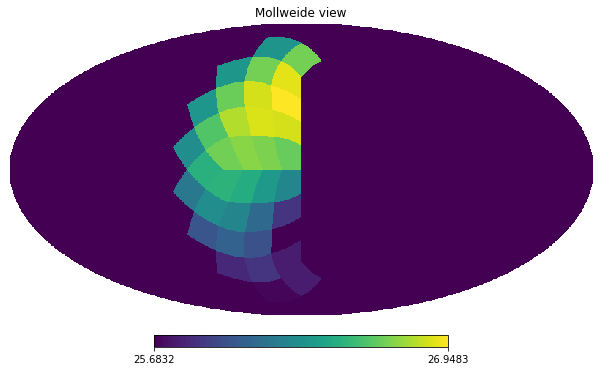

In [8]:
# fill it in with g-band
hpmap[spec['hpid'][good]] = spec['mags'][good][:,1]
hp.mollview(hpmap, rot=[0,90], min=spec['mags'][good][:,1].min())

In [9]:
# I think that's about right, it'll be symetric for azimuth to the moon and I don't need to go negative alt, so that's why I on't saved ~1/4 full sky.